In [2]:
import pandas as pd
import seaborn as sns

In [17]:
raw_df = pd.read_csv('./first_batch.tsv', sep='\t')

In [25]:
data = {}
for column_name, column_data in raw_df.iteritems():
    if "alpaca" in column_name and "MAX" not in column_name and "MIN" not in column_name:
        if max(column_data) == 0:
            perf = 0.50
        else:
            perf = max(column_data)
        layer = int(column_name.split(" - ")[0].split(".")[-4])
        token_id = int(column_name.split(" - ")[0].split(".")[-2])
        
        data[(layer, token_id)] = perf

In [46]:
df = pd.DataFrame(list(data.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

<AxesSubplot:xlabel='Token Position Idx', ylabel='LLaMA Layer Idx'>

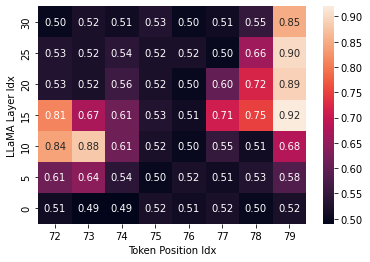

In [47]:
sns.heatmap(
    heatmap_df, yticklabels=heatmap_df.index[::-1],
    annot=True, fmt='.2f'
)

In [8]:
raw_df = pd.read_csv('./second_batch.csv')

In [9]:
data = {}
for column_name, column_data in raw_df.iteritems():
    if "alpaca" in column_name and "MAX" not in column_name and "MIN" not in column_name:
        if max(column_data) == 0:
            perf = 0.50
        else:
            perf = max(column_data)
        layer = int(column_name.split(" - ")[0].split(".")[-4])
        token_id = int(column_name.split(" - ")[0].split(".")[-2])
        
        data[(layer, token_id)] = perf

In [10]:
df = pd.DataFrame(list(data.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

<AxesSubplot:xlabel='Token Position Idx', ylabel='LLaMA Layer Idx'>

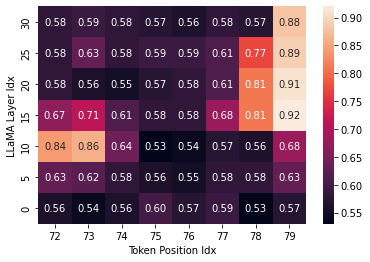

In [11]:
sns.heatmap(
    heatmap_df, yticklabels=heatmap_df.index[::-1],
    annot=True, fmt='.2f'
)

In [3]:
raw_df = pd.read_csv('./third_batch.csv')

In [4]:
data = {}
for column_name, column_data in raw_df.iteritems():
    if "alpaca" in column_name and "MAX" not in column_name and "MIN" not in column_name:
        if max(column_data) == 0:
            perf = 0.50
        else:
            perf = max(column_data)
        layer = int(column_name.split(" - ")[0].split(".")[-4])
        token_id = int(column_name.split(" - ")[0].split(".")[-2])
        
        data[(layer, token_id)] = perf

In [5]:
df = pd.DataFrame(list(data.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

<AxesSubplot:xlabel='Token Position Idx', ylabel='LLaMA Layer Idx'>

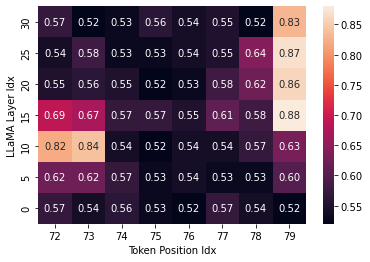

In [6]:
sns.heatmap(
    heatmap_df, yticklabels=heatmap_df.index[::-1],
    annot=True, fmt='.2f'
)